## Let's try pandas to get data and understand it

### Get data

In [69]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%pylab inline

# get iris dataset at UCI ML-repository
# https://archive.ics.uci.edu/ml/datasets/iris
iris_file = os.environ['HOME'] + '/ml0/dataset/iris.csv'

header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(iris_file, names=header)

# what's the dimension of our data
data_dim = iris_data.shape[1] - 1
print('dimension (number of attributes): ' + str(data_dim))

# how many labels we have?
labels = set(iris_data['class'])
print('number of labels: ' + str(len(labels)))
print('labels: ' + str(labels))

# how many instances for each label?
for l in labels:
    print(l + ': ' + str(len([x for x in iris_data['class'] if x == l])))
    
# let's see a sample of dataset
iris_data.head()

Populating the interactive namespace from numpy and matplotlib
dimension (number of attributes): 4
number of labels: 3
labels: set(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])
Iris-virginica: 50
Iris-setosa: 50
Iris-versicolor: 50


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Understand data

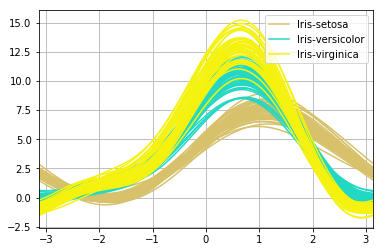

In [70]:
from pandas.plotting import andrews_curves

andrews_curves(iris_data, 'class')

#### ok, `Iris-setosa` has less overlap...
#### whereas distinguish `Iris-versicolor` from-to `Iris-virginica` is more difficult

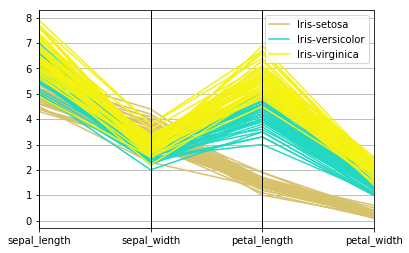

In [71]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(iris_data, 'class')

#### parallel coordinates shows us: distribution of data regarding to attributes
##### it looks like `petal_length` and `petal_width` are good attributes to discriminate data => better information gain

In [72]:
# for instance, we can select all Iris-setosa using just petal length or width

# using length
sample = iris_data[iris_data.petal_length < 3]
sample_size = sample.shape[0]
print(sample_size)
print(any(sample['class'] != 'Iris-setosa'))

# using width
sample = iris_data[iris_data.petal_width < 1]
sample_size = sample.shape[0]
print(sample_size)
print(any(sample['class'] != 'Iris-setosa'))

50
False
50
False


### Let's try a classification algorithm based on information gain (entropy): Decision Tree

In [73]:
import os
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris_file = os.environ['HOME'] + '/ml0/dataset/iris.csv'

header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(iris_file, names=header)

# classification problem: f: X -> Y, where X is a matrix (array of attributes of samples), and Y are labels

# attributes
X = iris_data[iris_data.columns[:-1]].values

# labels (map string to number)
number_label = {v: k for (k,v) in enumerate(set(iris_data['class']))}
Y = np.array([number_label[l] for l in iris_data['class']])

#### Finally, we create our `f` (a model, a classifier)

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

# evaluation using 10-fold-cross-validation
scores = cross_val_score(clf, X, Y, cv=10)

# 10-CV average accuracy
print('Average accuracy: ' + str(scores.mean()))
print(scores.std())

Average accuracy: 0.96
0.0442216638714
